
# Task 1 : Prediction using Supervised ML


# Name : Divyansh Kogta

<br>


## Problem Statement

*  <b>To predict the percentage of an student based on the no. of study hours. </b>
* <b> To predict the score if a student studies for 9.25 hrs/ day. </b>

In [90]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
# Importing the dataset
data = pd.read_csv('student_scores.csv')
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [92]:
data.shape

(25, 2)

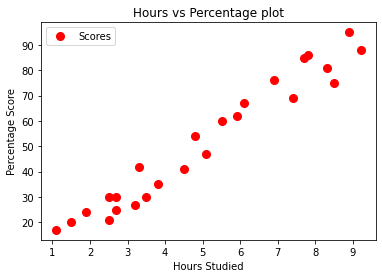

In [93]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o', c='r', markersize=8)
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.title('Hours vs Percentage plot')
plt.show()

##### From the graph above, we can see that there is a positive linear relation between the number of hours studied and percentage of score

In [94]:
# Check if there is any missing values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Splitting Data into Dependent and Indepenent Variables
##### Dividing the data into "attributes" (inputs) and "labels" (outputs).

In [95]:
X = data.iloc[:, :-1].values  # independent feature
y = data.iloc[:, -1].values   # dependent feature

In [100]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [101]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


## TRAIN TEST SPLIT

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training model using Linear Regression

In [103]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

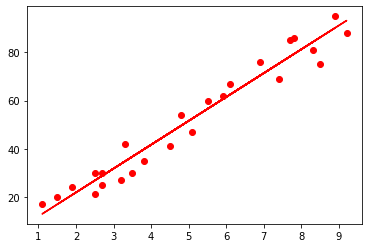

In [104]:
# Plotting the regression line

line = lr.coef_*X + lr.intercept_

# Plotting for the test data
plt.scatter(X, y, c='r')
plt.plot(X, line, c='r')

## Predictions

In [105]:
print(X_test) # Testing data - In Hours
y_pred = lr.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [106]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Model Evaluation

* <b> The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.  </b>

In [107]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [108]:
# Variance Score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('Variance Score: %.2f' %r2)

Variance Score: 0.95


Text(0.5, 1.0, 'Scores vs Hours Test set plot')

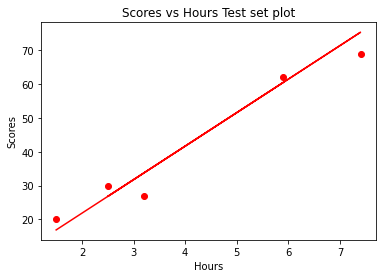

In [116]:
# Plotting graph for test dataset
plt.scatter(X_test, y_test, c='r')
plt.plot(X_test, y_pred, c='r')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Scores vs Hours Test set plot')

## Predicting the score if a student studies for 9.25 hrs/ day

In [112]:
hours = 9.25
prediction = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(prediction[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538
